In [1]:
import pandas as pd
import numpy as np 

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('sms.tsv', header=None, sep = "\t", names = ['label', 'message'])
df.shape

(5572, 2)

In [3]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

In [6]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
X = df.message
y = df.label_num

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100 )

In [9]:
vect = CountVectorizer()

In [10]:
vect.fit(X_train)
x_train_dtm = vect.transform(X_train)

In [11]:
X_train.head()

3730                             I'm at home. Please call
974                          what is your account number?
4583    Wow didn't think it was that common. I take it...
4028        Yes, princess. Are you going to make me moan?
1447    Looks like u wil b getting a headstart im leav...
Name: message, dtype: object

In [12]:
x_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
feature_names = vect.get_feature_names()

In [14]:
Xtrain  = pd.DataFrame(x_train_dtm.toarray(), columns=feature_names)

In [15]:
Xtrain.head()

,00,000,0089,0121,01223585236,02,0207,02072069400,02073162414,021,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
print(vect.vocabulary_)

{'at': 1037, 'home': 3223, 'please': 4868, 'call': 1496, 'what': 6927, 'is': 3477, 'your': 7145, 'account': 734, 'number': 4510, 'wow': 7057, 'didn': 2133, 'think': 6325, 'it': 3488, 'was': 6846, 'that': 6292, 'common': 1785, 'take': 6177, 'all': 848, 'back': 1112, 'ur': 6671, 'not': 4485, 'freak': 2763, 'unless': 6639, 'chop': 1681, 'off': 4542, 'yes': 7126, 'princess': 5013, 'are': 973, 'you': 7140, 'going': 2946, 'to': 6410, 'make': 4026, 'me': 4096, 'moan': 4215, 'looks': 3902, 'like': 3820, 'wil': 6967, 'getting': 2907, 'headstart': 3130, 'im': 3350, 'leaving': 3777, 'here': 3168, 'bout': 1351, '30ish': 393, 'but': 1467, 'if': 3338, 'desperate': 2107, 'for': 2727, 'my': 4333, 'company': 1788, 'could': 1889, 'head': 3125, 'in': 3377, 'earlier': 2314, 'we': 6871, 'were': 6915, 'goin': 2945, 'meet': 4115, 'rummer': 5416, 'dont': 2231, 'know': 3679, 'bring': 1406, 'some': 5820, 'food': 2718, 'save': 5483, 'money': 4243, 'on': 4573, 'wedding': 6887, 'lingerie': 3839, 'www': 7082, 'brid

In [17]:
x_test_dtm = vect.transform(X_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
nb = MultinomialNB()
nb.fit(x_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
pred = nb.predict(x_test_dtm)

In [21]:
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
accuracy_score(y_test, pred)

0.9868421052631579

In [24]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.98      0.92      0.95       224

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [25]:
print(confusion_matrix(y_test, pred))

[[1444    4]
 [  18  206]]


In [29]:
from wordcloud import WordCloud, STOPWORDS

In [30]:
X_ham = df[df.label_num == 0].message

In [31]:
X_spam = df[df.label_num == 1].message

In [32]:
word_ham = ' '.join(X_ham)

In [33]:
word_spam = ' '.join(X_spam)

In [34]:
import matplotlib.pyplot as plt

In [37]:
#word cloud for ham
worlcloud = WordCloud(width= 800,
                     height = 800,
                     background_color='white',
                     min_font_size=10).generate(word_ham)

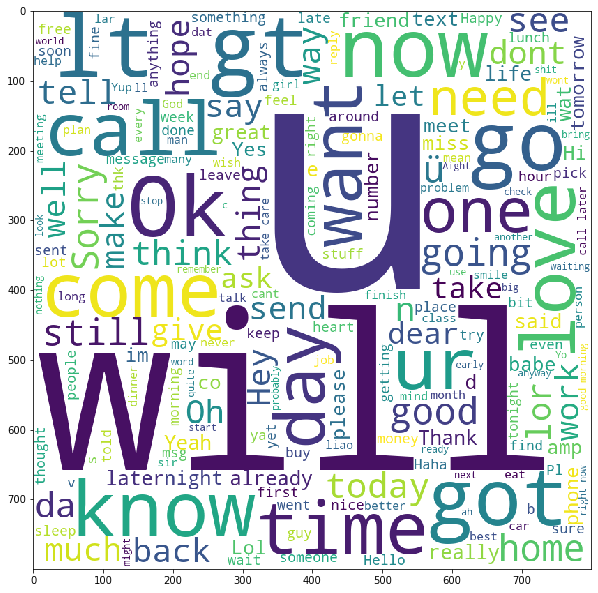

In [36]:
plt.figure(figsize=(10,15))
plt.imshow(worlcloud)

In [ ]:
#Word Cl
orlcloud = WordCloud(width= 800,
                     height = 800,
                     background_color='white',
                     min_font_size=10).generate(word_spam)